In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("train.csv")

In [93]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
df.replace({np.nan : "NA"}, inplace = True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [95]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [96]:
X = df.copy()
y = X.pop("SalePrice")

In [97]:
X.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal


In [101]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [98]:
from sklearn.feature_selection import mutual_info_regression

In [110]:
def generate_mi_score(X, y):
    X = X.copy()
    for column in X.select_dtypes(include = ['category', 'object']):
        X[column], _ = X[column].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.columns]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state = 0)
    mi_scores = pd.Series(mi_scores, name = 'Mi_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [111]:
mi_scores = generate_mi_score(X, y)

In [113]:
mi_scores[:10]

OverallQual     0.509209
GrLivArea       0.368235
GarageCars      0.367872
KitchenQual     0.332709
ExterQual       0.326571
BsmtQual        0.321057
GarageArea      0.277276
FullBath        0.277040
YearBuilt       0.273679
GarageFinish    0.269842
Name: Mi_scores, dtype: float64

In [126]:
def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending = True)
    width = np.arange(len(mi_scores))
    tick_labels = list(mi_scores.index)
    plt.barh(width, mi_scores, color = 'blue')
    plt.yticks(width, tick_labels)
    plt.show()

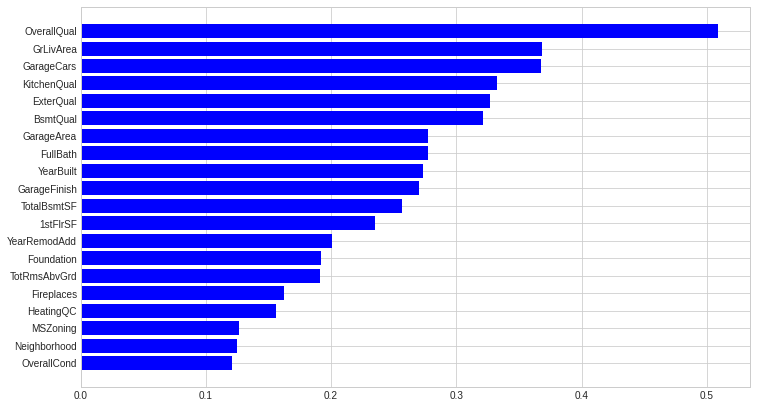

In [130]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores.head(20))

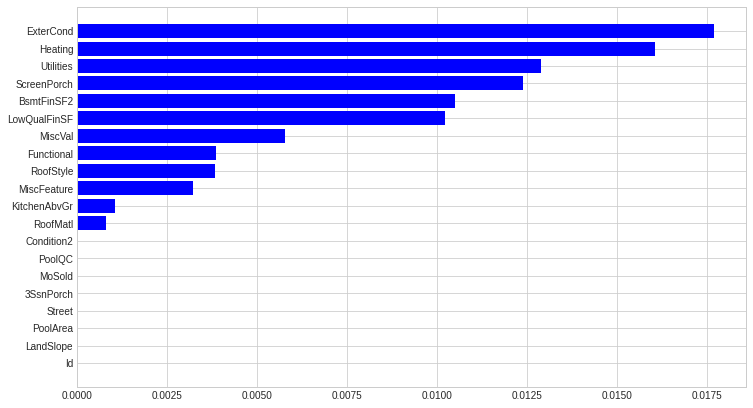

In [131]:
plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores.tail(20))

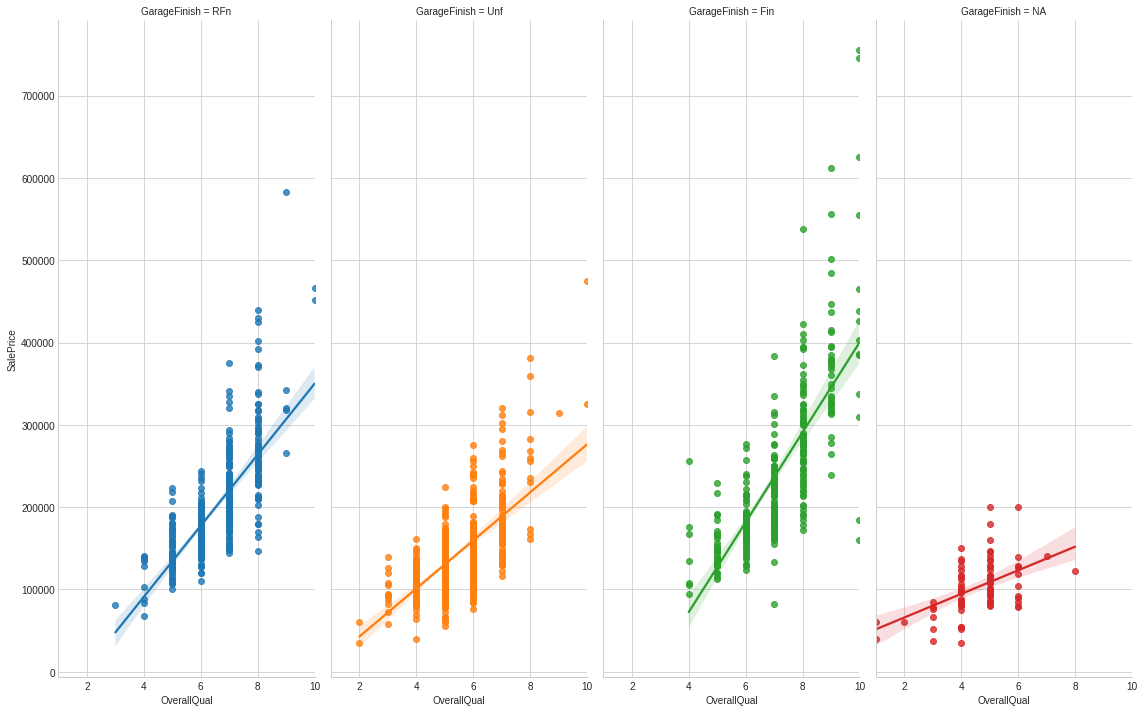

In [149]:
sns.lmplot(x = 'OverallQual', y = 'SalePrice', data = df, col = 'GarageFinish', 
           hue = 'GarageFinish', aspect = 0.4, height = 10)